# Yield prediction
## Data exploration

In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

In [3]:
data_path = "../../../WorldCrops/data/cropdata/Bavaria"

In [4]:
test_area = gpd.read_file(os.path.join(data_path, "Test_area.shp"))
test_area

,year,FID_1,Feldnummer,Schlag,NC_ant,Nutz_ant,Flaeche,Feld,area,geometry
0,2018,DEBYLI8318000240,9,1,592,Dauergr. aus der Erzeugung genommen,3.16,DEBYLI8318000240 9 1,3.840305,"POLYGON ((11.64185 48.39219, 11.64177 48.39224..."
1,2018,DEBYLI8310000056,52,1,115,Winterweizen (Weichweizen),0.73,DEBYLI8310000056 52 1,0.880725,"POLYGON ((11.61984 48.38011, 11.62100 48.38017..."
2,2018,DEBYLI8310000341,58,1,958,Naturschutzflaechen (keine landw. Verwertung),0.36,DEBYLI8310000341 58 1,0.442151,"POLYGON ((11.62244 48.38740, 11.62252 48.38735..."
3,2018,DEBYLI8318000126,343,1,115,Winterweizen (Weichweizen),1.36,DEBYLI8318000126 343 1,1.652525,"POLYGON ((11.65229 48.38673, 11.65261 48.38706..."
4,2018,DEBYLI8318000121,337,1,115,Winterweizen (Weichweizen),4.32,DEBYLI8318000121 337 1,5.243091,"POLYGON ((11.64572 48.38789, 11.64585 48.38705..."
...,...,...,...,...,...,...,...,...,...,...
296,2018,DEBYLI8310000347,45,2,996,"Unbefestigte Mieten. Stroh-, Futter- und Dungl...",0.06,DEBYLI8310000347 45 2,0.074861,"POLYGON ((11.63840 48.37505, 11.63889 48.37507..."
297,2018,DEBYLI8310000347,45,3,132,Sommergerste,2.17,DEBYLI8310000347 45 3,2.626510,"POLYGON ((11.63768 48.37700, 11.63799 48.37709..."
298,2018,DEBYLI8318000115,202,1,422,Kleegras - Klee-/Luzernegras-Gemisch,4.37,DEBYLI8318000115 202 1,5.301851,"POLYGON ((11.64870 48.39368, 11.64868 48.39298..."
299,2018,DEBYLI8318000117,206,1,121,Winterroggen,5.97,DEBYLI8318000117 206 1,7.246786,"POLYGON ((11.64856 48.39601, 11.64908 48.39585..."


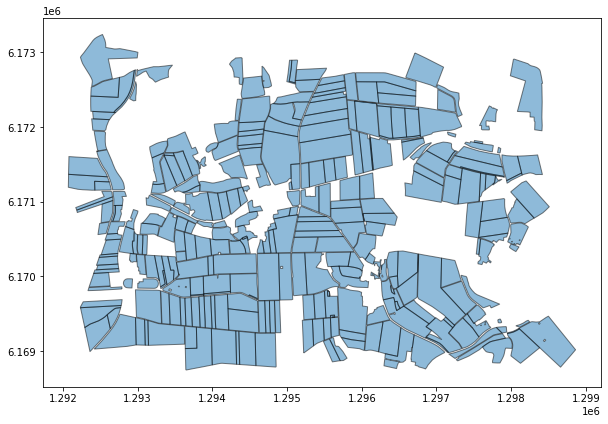

In [13]:
test_area = test_area.to_crs(epsg=3857)
ax = test_area.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.show()

In [5]:
yields_df = pd.read_csv(os.path.join(data_path, "yields/yields2018.csv"))
yields_df

,Elevation(m),Ertr.masse (Nass)(tonne/ha),Ertr.masse (Tr.)(tonne/ha),Ertr.vol (Tr.)(L/ha),ErtragNass,ErtragTr,Feuchtigkeit(%),Jahr,Latitude,Longitude,Name,TAG
0,515.26,2.257,2.257,3652.6,68.710855,68.645177,13.6,2018,48.429010,11.673614,Grafenfeld,UNI
1,515.25,2.899,2.899,4692.5,68.710855,68.645177,13.3,2018,48.429009,11.673595,Grafenfeld,UNI
2,515.23,3.410,3.410,5519.7,68.710855,68.645177,12.7,2018,48.429008,11.673574,Grafenfeld,UNI
3,515.24,4.134,4.134,6691.6,68.710855,68.645177,12.2,2018,48.429007,11.673554,Grafenfeld,UNI
4,515.26,4.830,4.830,7817.6,68.710855,68.645177,12.7,2018,48.429006,11.673535,Grafenfeld,UNI
...,...,...,...,...,...,...,...,...,...,...,...,...
132805,473.88,4.899,4.899,6343.6,83.499814,83.499170,12.1,2018,48.395223,11.702102,Voettingerfeld,UNI
132806,473.92,3.987,3.987,5162.2,83.499814,83.499170,12.0,2018,48.395232,11.702080,Voettingerfeld,UNI
132807,473.99,3.477,3.477,4502.2,83.499814,83.499170,12.3,2018,48.395242,11.702058,Voettingerfeld,UNI
132808,474.05,3.032,3.032,3926.1,83.499814,83.499170,12.4,2018,48.395253,11.702037,Voettingerfeld,UNI


In [16]:
yields_df["Name"].unique()

array(['Grafenfeld', 'Krohberg', 'Radarstation', 'Sieblerfeld',
       'Striegelfeld', 'Baumacker', 'D2', 'D3', 'D4', 'D8', 'Dichtlacker',
       'Feldhof1', 'Feldhof1a', 'Feldhof2', 'Heindlacker', 'Heng',
       'Holzacker', 'Itzling2', 'Itzling4', 'Itzling5', 'Itzling6',
       'Muehlacker', 'Neulandsiedlung', 'Schluetterfabrik',
       'Thalhausen138', 'Thalhausen141', 'Viehhausen1', 'Viehhausen11',
       'Viehhausen3', 'Viehhausen5', 'Voettingerfeld'], dtype=object)

In [11]:
s2_df = pd.read_excel(os.path.join(data_path, "yields/satellite_data_orginal.xlsx"))
s2_df

,Unnamed: 0,Name,Ertrag,date,Month,Jahr,ETC_NDVI,ETC_REIP,ETC_NDRE,ETC_NDWI,...,delta_diff_etc_ndvi,delta_diff_etc_ndre,delta_diff_etc_ndwi,delta_diff_etc_reip,delta_diff_etc_ndvi_norm,delta_diff_etc_ndre_norm,delta_diff_etc_ndwi_norm,delta_diff_etc_reip_norm,CUM_ETC_NDVI_norm,cum_rain
0,1937,Baumacker,90.0,2018-03-01,3,2018,-0.010482,846.786671,-0.034891,0.825820,...,-0.010482,-0.034891,0.825820,846.786671,0.056311,0.043562,1.111303,0.421761,0.056311,0.0
1,1938,Baumacker,90.0,2018-03-02,3,2018,-0.007886,637.040126,-0.026249,0.621267,...,-0.007886,-0.026249,0.621267,637.040126,0.042363,0.032772,0.836037,0.317292,0.098673,0.0
2,1939,Baumacker,90.0,2018-03-03,3,2018,-0.006609,533.900296,-0.021999,0.520681,...,-0.306609,-0.321999,0.220681,533.600296,-0.264496,-0.272534,0.400678,-0.034079,0.134177,0.3
3,1940,Baumacker,90.0,2018-03-04,3,2018,0.477468,782.340619,0.258575,0.106442,...,0.177468,-0.041425,-0.193558,782.040619,0.311936,0.131986,0.087646,0.165418,0.746113,0.6
4,1941,Baumacker,90.0,2018-03-05,3,2018,0.432016,707.865764,0.233960,0.096310,...,0.432016,0.233960,0.096310,707.865764,0.553682,0.390863,0.350744,0.421112,1.299795,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,25659,Voettingerfeld,80.0,2018-07-27,7,2018,2.007801,3178.334043,1.393959,-0.070246,...,1.707801,1.093959,-0.370246,3178.034043,2.258466,1.891276,0.733389,1.569992,387.137378,321.4
3668,25660,Voettingerfeld,80.0,2018-07-28,7,2018,2.136181,3381.557842,1.483089,-0.074738,...,1.336181,0.683089,-0.874738,3380.757842,1.922055,1.531387,0.299464,1.189560,389.859433,322.2
3669,25661,Voettingerfeld,80.0,2018-07-29,7,2018,2.038195,3226.447098,1.415060,-0.071310,...,2.038195,1.415060,-0.071310,3226.447098,2.597195,2.224447,1.049032,1.898299,392.456628,322.2
3670,25662,Voettingerfeld,80.0,2018-07-30,7,2018,1.925898,3378.399660,1.360856,-0.275350,...,1.925898,1.360856,-0.275350,3378.399660,2.486251,2.174169,0.888370,1.988608,394.942879,322.2


In [17]:
s2_df["Name"].unique()

array(['Baumacker', 'D2', 'D3', 'D4', 'D8', 'Dichtlacker', 'Feldhof1',
       'Feldhof1a', 'Feldhof1b', 'Feldhof2', 'Heindlacker', 'Heng',
       'Holzacker', 'Itzling2', 'Itzling4', 'Itzling5', 'Itzling6',
       'Muehlacker', 'Neulandsiedlung', 'Schluetterfabrik',
       'Thalhausen138', 'Thalhausen141', 'Thalhausen86', 'Voettingerfeld'],
      dtype=object)

## Pre-processing
Based on <i> yields/result_split_S2A_linear_W_WW_2018.xlsx </i>

In [15]:
feature_cols = ["et0", "rain", 'B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean', 'B6_mean', 'B7_mean',
                'B8_mean', 'B8A_mean', 'B9_mean', 'B10_mean', 'B11_mean', 'B12_mean']

In [31]:
experiment_df = pd.read_excel(os.path.join(data_path, "yields/result_split_S2A_linear_W_WW_2018.xlsx"))
# in_situ_df = pd.read_excel(os.path.join(data_path, "yields/satellite_data_orginal.xlsx"))

experiment_df = experiment_df.dropna()
experiment_df

,Unnamed: 0,date,Ertrag,Month,Jahr,ETC_NDVI,ETC_REIP,ETC_NDRE,ETC_NDWI,ETC_NDVI_norm,...,delta_diff_etc_ndre,delta_diff_etc_ndwi,delta_diff_etc_reip,delta_diff_etc_ndvi_norm,delta_diff_etc_ndre_norm,delta_diff_etc_ndwi_norm,delta_diff_etc_reip_norm,CUM_ETC_NDVI_norm,cum_rain,Name
0,206,2018-03-04,90.0,3,2018,0.061871,623.871393,0.015838,0.514635,0.121474,...,-0.069876,0.428920,623.785678,0.035760,0.002343,0.641743,0.235841,0.258819,0.225000,Baumacker
1,207,2018-03-11,90.0,3,2018,0.569548,933.215529,0.308441,0.126970,0.729948,...,0.208441,0.026970,933.115529,0.629948,0.415295,0.362404,0.455174,3.442798,0.857143,Baumacker
2,208,2018-03-18,90.0,3,2018,0.205922,858.859597,0.096495,0.637236,0.316112,...,-2.160648,-1.619907,856.602454,-1.941031,-2.022349,-1.281772,-1.740866,7.711594,11.957143,Baumacker
3,209,2018-03-25,90.0,3,2018,0.249405,825.882644,0.135162,0.512013,0.361191,...,-0.164838,0.212013,825.582644,0.061191,-0.020273,0.530801,0.194415,8.866347,18.700000,Baumacker
4,210,2018-04-01,90.0,4,2018,0.772628,1146.071643,0.458383,0.200026,0.977940,...,-1.255902,-1.514260,1144.357357,-0.736345,-0.979861,-1.101934,-1.035221,14.261183,26.328571,Baumacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2734,2018-07-01,80.0,7,2018,2.785618,2673.144425,1.951451,1.203877,3.380371,...,-1.819977,-2.567552,2669.372997,-0.391057,-0.928597,-1.579331,-2.202961,301.524650,238.042857,Voettingerfeld
524,2735,2018-07-08,80.0,7,2018,2.916852,3104.682119,2.046765,1.194417,3.569302,...,0.118193,-0.734154,3102.753548,1.640730,1.091071,0.403896,-0.106237,326.945329,254.971429,Voettingerfeld
525,2736,2018-07-15,80.0,7,2018,2.181092,2946.598285,1.585186,0.751668,2.729118,...,0.028044,-0.805475,2945.041142,1.171976,0.849218,0.254476,0.170668,348.252684,266.400000,Voettingerfeld
526,2737,2018-07-22,80.0,7,2018,1.986068,2836.303315,1.450526,0.552321,2.499877,...,-5.220902,-6.119108,2829.631886,-4.171551,-4.451937,-5.107420,-5.008394,367.414297,284.271429,Voettingerfeld


### Resample to monthly

In [32]:
experiment_df = experiment_df.groupby('Name').resample('M', on="date").mean()
experiment_df

Unnamed: 0  Ertrag  Month    Jahr  ETC_NDVI  \
Name           date                                                      
Baumacker      2018-03-31       207.5    90.0    3.0  2018.0  0.271687   
               2018-04-30       212.0    90.0    4.0  2018.0  1.856472   
               2018-05-31       216.5    90.0    5.0  2018.0  2.960930   
               2018-06-30       220.5    90.0    6.0  2018.0  3.318920   
               2018-07-31       225.0    90.0    7.0  2018.0  1.708364   
...                               ...     ...    ...     ...       ...   
Voettingerfeld 2018-03-31      2718.5    80.0    3.0  2018.0  0.253667   
               2018-04-30      2723.0    80.0    4.0  2018.0  1.802980   
               2018-05-31      2727.5    80.0    5.0  2018.0  2.683519   
               2018-06-30      2731.5    80.0    6.0  2018.0  3.216019   
               2018-07-31      2736.0    80.0    7.0  2018.0  2.392723   

                              ETC_REIP  ETC_NDRE  ETC_NDWI  ETC_NDVI_norm  \
Name           date                                                         
Baumacker      2018-03-31   810.457291  0.138984  0.447713       0.382181   
               2018-04-30  2183.291472  1.302635  0.633582       2.292304   
               2018-05-31  2712.277065  2.388341  1.685197       3.578603   
               2018-06-30  3015.842197  2.698654  2.016289       4.008283   
               2018-07-31  2943.078026  1.141773  0.484685       2.200131   
...                                ...       ...       ...            ...   
Voettingerfeld 2018-03-31   850.521214  0.125834  0.337711       0.362009   
               2018-04-30  2178.706322  1.196899  0.287237       2.232381   
               2018-05-31  2698.146077  2.013849  1.095787       3.267681   
               2018-06-30  3006.517799  2.544087  1.632473       3.892889   
               2018-07-31  2951.946440  1.702933  0.727410       2.967037   

                           ETC_REIP_norm  ...  delta_diff_etc_ndvi  \
Name           date                       ...                        
Baumacker      2018-03-31       0.471855  ...            -0.414028   
               2018-04-30       1.284323  ...             1.276472   
               2018-05-31       1.580434  ...            -0.381927   
               2018-06-30       1.753779  ...             0.133206   
               2018-07-31       1.731936  ...            -1.145922   
...                                  ...  ...                  ...   
Voettingerfeld 2018-03-31       0.474454  ...            -0.432048   
               2018-04-30       1.284180  ...             1.222980   
               2018-05-31       1.579412  ...            -0.659338   
               2018-06-30       1.752811  ...             0.030305   
               2018-07-31       1.732171  ...            -0.461562   

                           delta_diff_etc_ndre  delta_diff_etc_ndwi  \
Name           date                                                   
Baumacker      2018-03-31            -0.546730            -0.238001   
               2018-04-30             0.722635             0.053582   
               2018-05-31            -0.954517            -1.657660   
               2018-06-30            -0.487060            -1.169425   
               2018-07-31            -1.712513            -2.369601   
...                                        ...                  ...   
Voettingerfeld 2018-03-31            -0.559880            -0.348003   
               2018-04-30             0.616899            -0.292763   
               2018-05-31            -1.329008            -2.247070   
               2018-06-30            -0.641627            -1.553241   
               2018-07-31            -1.151353            -2.126875   

                           delta_diff_etc_reip  delta_diff_etc_ndvi_norm  \
Name           date                                                        
Baumacker      2018-03-31           809.771576                 -0.303533   

In [33]:
targets = experiment_df.groupby("Name").mean()["Ertrag"]
targets

Name
Baumacker           90.000000
D2                  63.000000
D3                  70.000000
D4                  68.412647
D8                  67.000000
Dichtlacker         58.515511
Feldhof1            73.000000
Feldhof1a           73.000000
Feldhof1b           73.000000
Feldhof2            73.000000
Heindlacker         75.527846
Heng                60.000000
Holzacker           68.000000
Itzling2            88.000000
Itzling5            81.000000
Itzling6            80.000000
Muehlacker          71.572643
Neulandsiedlung     74.615691
Schluetterfabrik    63.157894
Thalhausen138       62.000000
Thalhausen141       66.000000
Thalhausen86        50.000000
Voettingerfeld      80.000000
Name: Ertrag, dtype: float64

### Create time series per field, as input format for LSTM

In [42]:
experiment_df = experiment_df.reset_index()

In [51]:
time_series = [experiment_df[experiment_df["Name"] == name][feature_cols] for name in experiment_df["Name"].unique()]

print("Number of time series: {}".format(len(time_series)))
display([("Shape of time series {}: {}".format(i, x.shape)) for i, x in enumerate(time_series)])


Number of time series: 23


['Shape of time series 0: (5, 15)',
 'Shape of time series 1: (5, 15)',
 'Shape of time series 2: (5, 15)',
 'Shape of time series 3: (5, 15)',
 'Shape of time series 4: (5, 15)',
 'Shape of time series 5: (5, 15)',
 'Shape of time series 6: (5, 15)',
 'Shape of time series 7: (5, 15)',
 'Shape of time series 8: (5, 15)',
 'Shape of time series 9: (5, 15)',
 'Shape of time series 10: (5, 15)',
 'Shape of time series 11: (5, 15)',
 'Shape of time series 12: (5, 15)',
 'Shape of time series 13: (5, 15)',
 'Shape of time series 14: (5, 15)',
 'Shape of time series 15: (5, 15)',
 'Shape of time series 16: (5, 15)',
 'Shape of time series 17: (5, 15)',
 'Shape of time series 18: (5, 15)',
 'Shape of time series 19: (5, 15)',
 'Shape of time series 20: (5, 15)',
 'Shape of time series 21: (5, 15)',
 'Shape of time series 22: (5, 15)']

# Experiment RF

In [84]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
                            r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
sns.set_theme()
sns.set_style("darkgrid")

tqdm.pandas()

## Flatten time series so it can be used in RF

In [57]:
df = [ts.values.flatten() for ts in time_series]
df = pd.DataFrame(df)
df["yield"] = targets.values
df = df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,yield
0,1.115429,0.685714,0.406818,0.419649,0.412787,0.431597,0.477629,0.515783,0.512592,0.506375,...,0.142850,0.212885,0.244745,0.258268,0.275220,0.390961,1.939735,0.206153,0.136094,90.000000
1,1.115071,0.685714,0.253294,0.269218,0.275932,0.293047,0.325309,0.354576,0.357651,0.355078,...,0.129211,0.250877,0.300499,0.314120,0.332860,0.481733,2.003398,0.227465,0.144586,63.000000
2,1.237333,0.885714,0.185787,0.192122,0.198673,0.200628,0.244312,0.301629,0.313409,0.313716,...,0.114152,0.236026,0.281472,0.291918,0.307872,0.412714,1.902261,0.198418,0.120736,70.000000
3,1.115321,0.685714,0.141092,0.139819,0.145412,0.146322,0.179284,0.213111,0.219847,0.217307,...,0.106543,0.187821,0.223325,0.232083,0.246627,0.345666,1.830445,0.178560,0.116553,68.412647
4,1.115714,0.685714,0.244376,0.229773,0.215282,0.212781,0.243034,0.266779,0.267703,0.258631,...,0.105073,0.188251,0.229519,0.237791,0.252113,0.356738,2.059636,0.177900,0.117435,67.000000
5,1.114607,0.685714,0.162810,0.166228,0.164693,0.173162,0.207820,0.248440,0.257159,0.259205,...,0.165377,0.260823,0.302413,0.315738,0.338323,0.546162,12.635335,0.288410,0.194191,58.515511
6,1.115393,0.685714,0.433862,0.404843,0.388671,0.401402,0.445855,0.480596,0.484646,0.483340,...,0.115027,0.239510,0.291211,0.303056,0.325182,0.471108,3.560486,0.199724,0.118723,73.000000
7,1.115536,0.685714,0.459659,0.481370,0.460955,0.474639,0.512126,0.534716,0.528709,0.521982,...,0.123892,0.245046,0.292841,0.303326,0.321635,0.462119,2.764689,0.201053,0.123947,73.000000
8,1.115714,0.685714,0.448105,0.438583,0.419119,0.430857,0.469242,0.491752,0.486165,0.479833,...,0.121147,0.235995,0.279079,0.290430,0.310176,0.408459,2.998352,0.203558,0.125018,73.000000
9,1.115786,0.685714,0.463299,0.476152,0.457445,0.472461,0.512181,0.534335,0.528597,0.521437,...,0.125810,0.215640,0.252798,0.263958,0.282607,0.434513,4.259993,0.210622,0.138308,73.000000


In [125]:
features = [ts.values.flatten() for ts in time_series]

rf = RandomForestRegressor(n_jobs=4)

pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

target_col = "yield"
feature_cols = list(range(0, len(df.columns)-1))

results = cross_validate(pipeline, X=df[feature_cols], y=df[target_col], cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)


display("Mean train R2: {}, individual folds: {}".format(np.mean(results["train_r2"]), results["train_r2"]))
display("Mean test R2: {}, individual folds: {}".format(np.mean(results["test_r2"]), results["test_r2"]))

'Mean train R2: 0.8502787825801731, individual folds: [0.80782895 0.85729026 0.88025416 0.84447385 0.86154669]'

'Mean test R2: -0.1714691201402468, individual folds: [ 0.40929051 -0.69267026 -0.20592046  0.24015641 -0.6082018 ]'

# Experiment LSTM

In [62]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score

/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vneuteb

In [87]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [89]:
def simple_lstm():
    inputs = keras.layers.Input(shape=(15, 5))
    lstm_out = keras.layers.LSTM(16, return_sequences=False)(inputs)
    # lstm_out = keras.layers.Dense(32)(lstm_out)
    outputs = keras.layers.Dense(1)(lstm_out)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
    return model

In [74]:
inputs = keras.layers.Input(shape=(15, 5))
lstm_out = keras.layers.LSTM(16, return_sequences=False)(inputs)
# lstm_out = keras.layers.Dense(32)(lstm_out)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15, 5)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                1408      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [102]:
feature_cols = ["et0", "rain", 'B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean', 'B6_mean', 'B7_mean',
                'B8_mean', 'B8A_mean', 'B9_mean', 'B10_mean', 'B11_mean', 'B12_mean',]

X = np.dstack(time_series)
X = np.moveaxis(X, [0, 1, 2], [2, 1, 0])

We use a simple train/test split for this experiment as it's a bit easier to code

In [120]:
train_test_split = 0.7
split_idx = int(len(X)*train_test_split)

In [121]:
scaler = StandardScaler()

# Standardize train data (fit scaler + transform)
X_train = X[:split_idx]
num_instances, num_time_steps, num_features = X_train.shape
X_train = X_train.reshape(-1, num_features)
X_train = scaler.fit_transform(X_train)
X_train = X_train.reshape(num_instances, num_time_steps, num_features)

y_train = targets[:split_idx]

# Standardize test data (transform only)
X_test = X[split_idx:]
num_instances, num_time_steps, num_features = X_test.shape
X_test = X_test.reshape(-1, num_features)
X_test = scaler.transform(X_test)
X_test = X_test.reshape(num_instances, num_time_steps, num_features)

y_test = targets[split_idx:]

model.fit(X_train, y_train, batch_size=1, epochs=50, verbose=0)
y_pred = model.predict(X_test)
result = r2_score(y_pred, y_test)
print("R2 score: {}".format(result))

R2 score: 0.0


Model learns to predict the mean...

In [122]:
y_pred

array([[72.50952],
       [72.50952],
       [72.50952],
       [72.50952],
       [72.50952],
       [72.50952],
       [72.50952]], dtype=float32)